In [1]:
#importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
 
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [14]:
df_usa = df[df["job_country"] == "United States"]
df_usa["job_posted_month"] = df_usa['job_posted_date'].dt.strftime('%B')

df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_usa_pivot.reset_index(inplace=True)

C:\Users\Mr. Juanpaulo\AppData\Local\Temp\ipykernel_1416\1143199105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["job_posted_month"] = df_usa['job_posted_date'].dt.strftime('%B')


In [15]:
df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot["job_posted_month"], format='%B').dt.month
df_usa_pivot.sort_values('month_no', inplace=True)
df_usa_pivot.set_index('job_posted_month',inplace=True)

df_usa_pivot.drop(columns='month_no',inplace= True)

In [17]:
df_Us_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

In [19]:
new_df = df_usa_pivot.merge(df_Us_software_pivot, on ='job_posted_month')

In [43]:
top_5 = (
 new_df.sum()
.sort_values(ascending=False)
.head()
.index
.to_list())
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

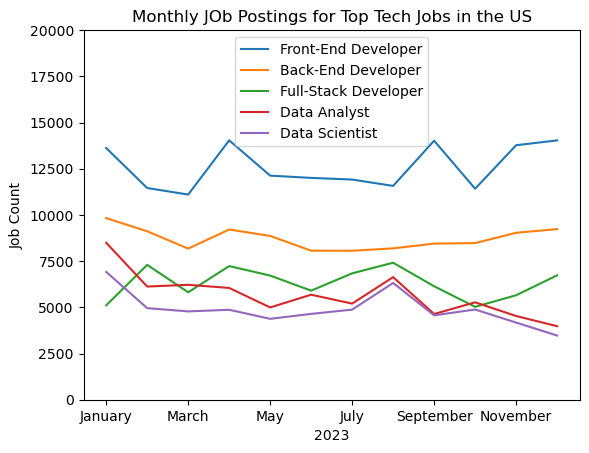

In [46]:
new_df[top_5].plot(kind='line')
plt.title('Monthly JOb Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()